In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [6]:
df[df['pm2.5'].isnull()]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


In [7]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [8]:
df.shape

(43824, 13)

In [9]:
df.drop('No', axis=1, inplace=True)

In [10]:
df['year'].value_counts()

2012    8784
2010    8760
2011    8760
2013    8760
2014    8760
Name: year, dtype: int64

In [11]:
temp = df[['year', 'month', 'day', 'hour']].astype(str).apply(lambda x: x.apply(lambda y: '0' + y if len(y) < 2 else y))
temp.head()

,year,month,day,hour
0,2010,01,01,00
1,2010,01,01,01
2,2010,01,01,02
3,2010,01,01,03
4,2010,01,01,04


In [12]:
df['date'] = df[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1)

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d-%H')

In [14]:
df[['date']]

,date
0,2010-01-01 00:00:00
1,2010-01-01 01:00:00
2,2010-01-01 02:00:00
3,2010-01-01 03:00:00
4,2010-01-01 04:00:00
...,...
43819,2014-12-31 19:00:00
43820,2014-12-31 20:00:00
43821,2014-12-31 21:00:00
43822,2014-12-31 22:00:00


In [15]:
df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

In [16]:
df.set_index('date', inplace=True)

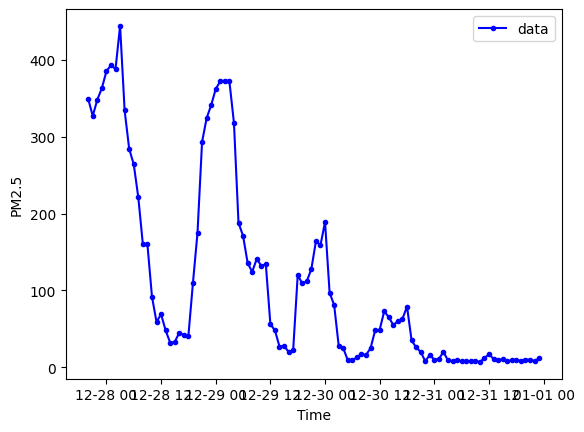

In [17]:
plt.plot(df.index[-100:], df['pm2.5'][-100:], 'b.-', label='data')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()

In [18]:
df.drop('pm2.5', axis=1, inplace=False)

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2010-01-01 00:00:00,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,-22,-3.0,1034.0,NW,242.70,0,0


In [19]:
df.reset_index(inplace=True)

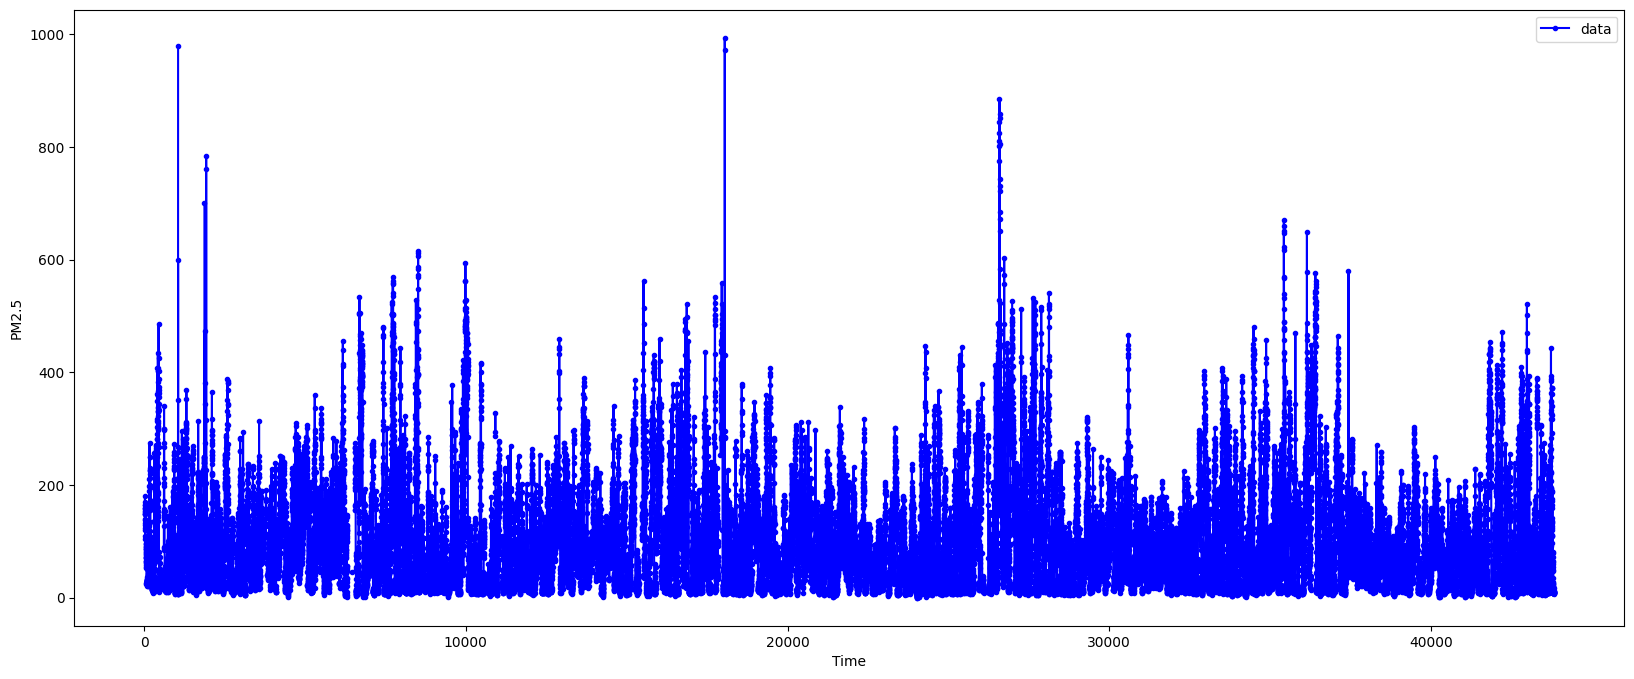

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(df.index, df['pm2.5'], 'b.-', label='data')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()

In [21]:
df.drop(['date', 'cbwd'], axis=1, inplace=True)

In [22]:
df.drop(df[df['pm2.5'].isnull()].index.to_list(), axis=0, inplace=True)

In [23]:
df.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0


In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

2023-01-06 21:05:48.344036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model_df = StandardScaler().fit_transform(df)

In [26]:
train_X, train_y = model_df, model_df[5:,0]
train_X.shape,train_y.shape

((41757, 7), (41752,))

In [27]:
model = keras.Sequential()
model.add(layers.LSTM(
    units = 128,
    input_shape =(5, 7)
))
model.add(layers.Dense(units = 1))
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)
model.summary()

2023-01-06 21:05:56.682993: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [28]:
full_n = train_y.shape[0]
n = int(train_y.shape[0]*0.7)

In [29]:
train = keras.preprocessing.timeseries_dataset_from_array(train_X[:n],train_y[:n],sequence_length=5,batch_size=1) #train
test = keras.preprocessing.timeseries_dataset_from_array(train_X[n:],train_y[n:],sequence_length=5,batch_size=1) #test

In [30]:
test_x = np.array([i[0] for i in test])
test_x.resize(( full_n - n, 5, 7))

In [31]:
model.fit(train)
y_pred = model.predict(test_x)
y_pred.shape

392/392 [==============================] - 2s 2ms/step


(12526, 1)

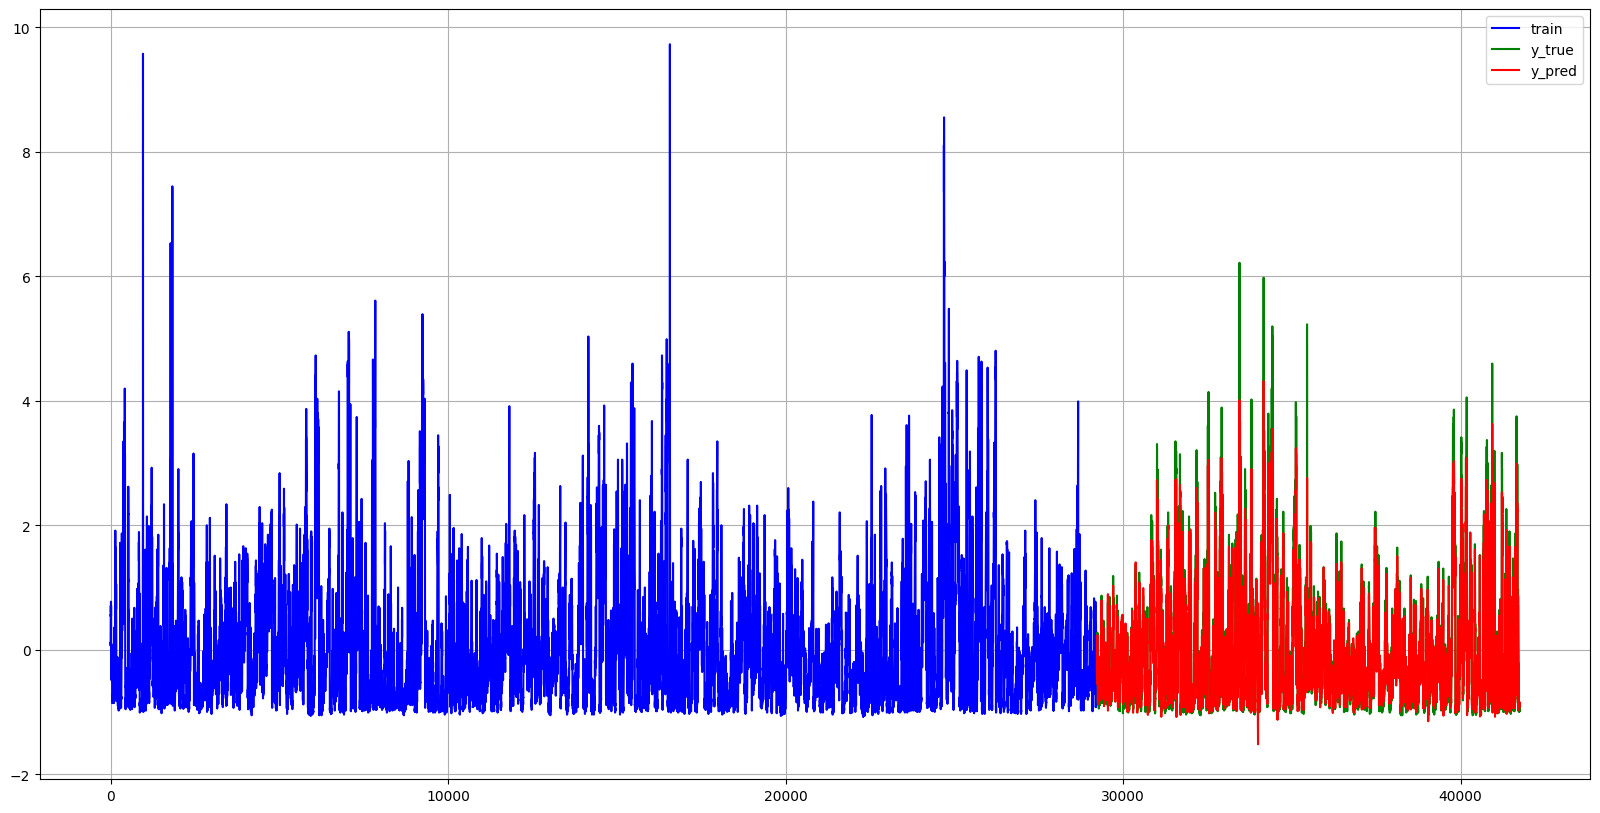

In [32]:
plt.figure(figsize=(20, 10))
plt.grid(which='major', axis='both', zorder=-0.5)
plt.plot( np.array(train_y)[:n],'b',label = 'train')
plt.plot(range(n,full_n),np.array(train_y)[n:],'g',label = 'y_true')
plt.plot(range(n,full_n), y_pred,'r',label = 'y_pred')
plt.legend()

In [33]:
import sklearn.metrics

In [34]:
sklearn.metrics.r2_score(train_y[n:], y_pred)

0.9141765130727901

In [45]:
model = keras.Sequential()
model.add(layers.SimpleRNN(
    units = 128,
    input_shape =(5, 7)
))
model.add(layers.Dense(units = 1))
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               17408     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(train)
y_pred = model.predict(test_x)
y_pred.shape

392/392 [==============================] - 1s 1ms/step


(12526, 1)

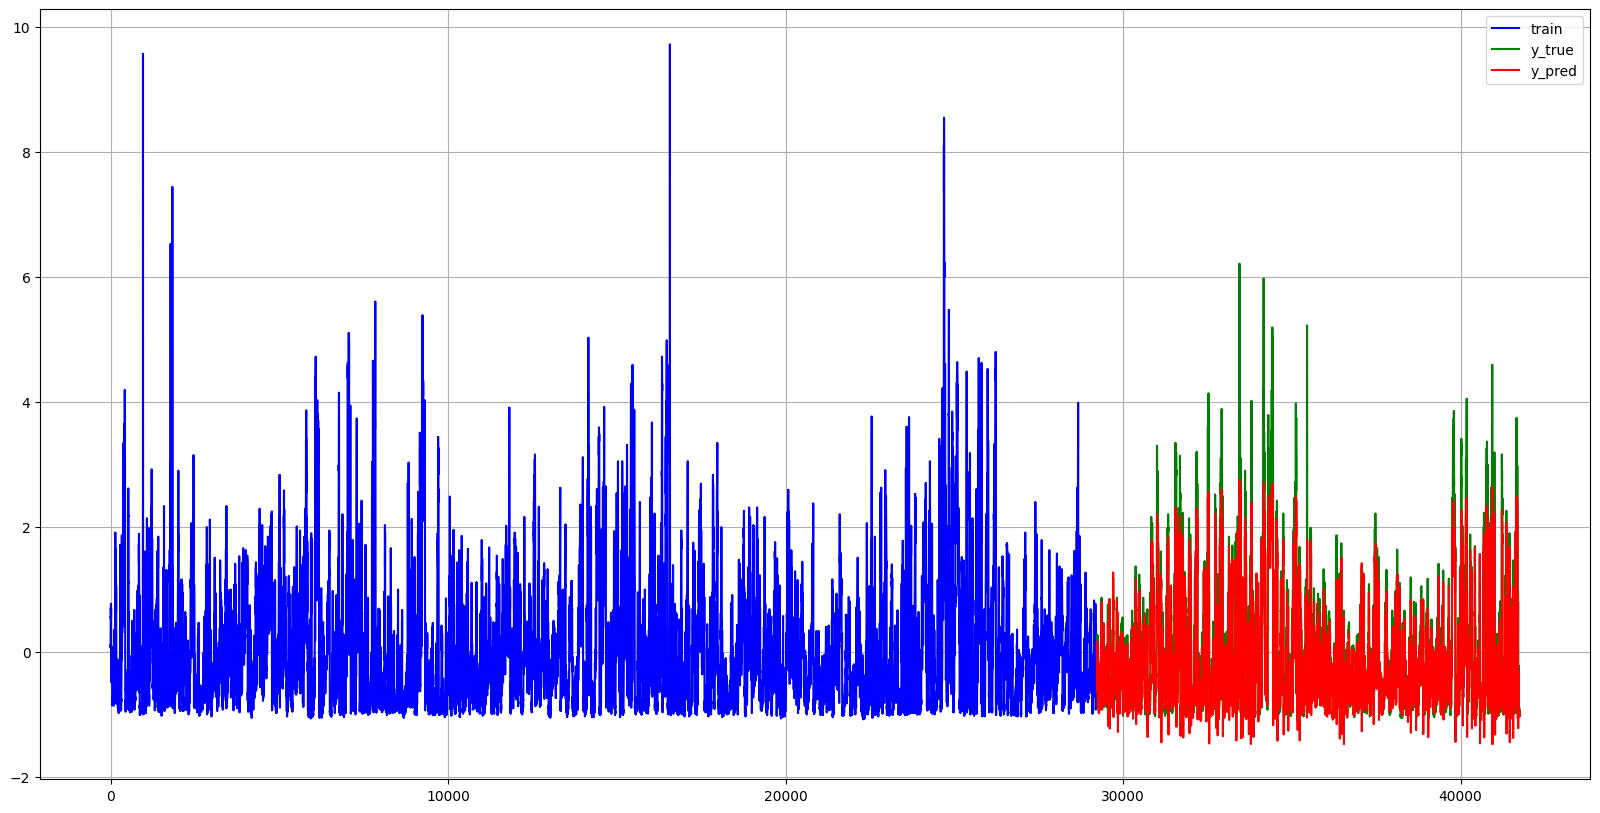

In [47]:
plt.figure(figsize=(20, 10))
plt.grid(which='major', axis='both', zorder=-0.5)
plt.plot( np.array(train_y)[:n],'b',label = 'train')
plt.plot(range(n,full_n),np.array(train_y)[n:],'g',label = 'y_true')
plt.plot(range(n,full_n), y_pred,'r',label = 'y_pred')
plt.legend()

In [48]:
sklearn.metrics.r2_score(train_y[n:], y_pred)

0.875367474325784

In [49]:
model = keras.Sequential()
model.add(layers.GRU(
    units = 128,
    input_shape =(5, 7)
))
model.add(layers.Dense(units = 1))
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               52608     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 52,737
Trainable params: 52,737
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(train)
y_pred = model.predict(test_x)
y_pred.shape

392/392 [==============================] - 1s 2ms/step


(12526, 1)

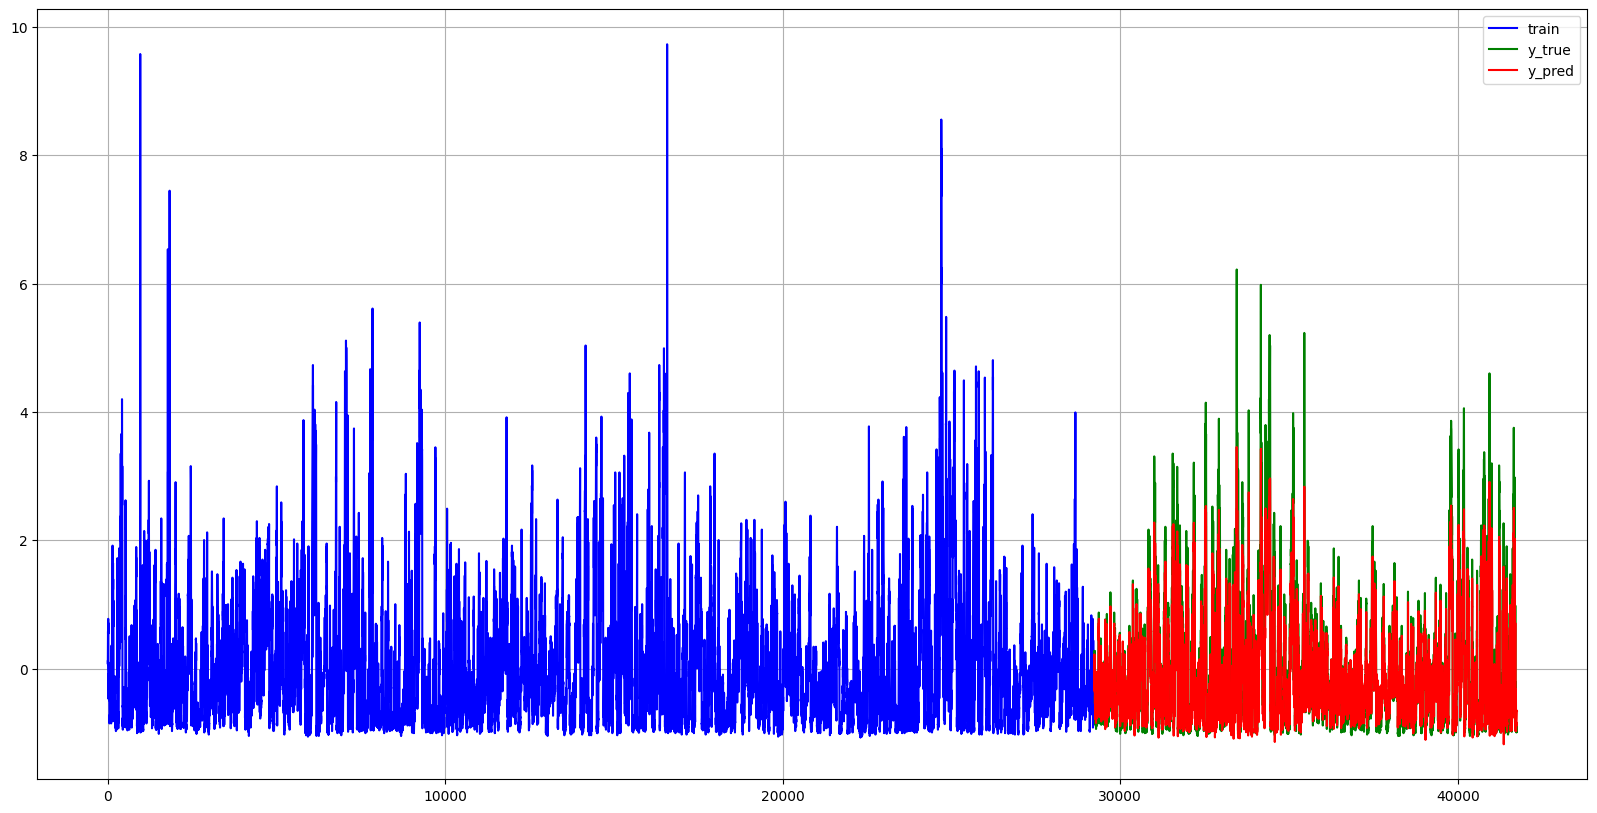

In [51]:
plt.figure(figsize=(20, 10))
plt.grid(which='major', axis='both', zorder=-0.5)
plt.plot( np.array(train_y)[:n],'b',label = 'train')
plt.plot(range(n,full_n),np.array(train_y)[n:],'g',label = 'y_true')
plt.plot(range(n,full_n), y_pred,'r',label = 'y_pred')
plt.legend()

In [52]:
sklearn.metrics.r2_score(train_y[n:], y_pred)

0.8635258332146751

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
linear_model = LinearRegression()
linear_model.fit([ np.array(i[0]).flatten() for i in train],[np.array(i[1]).flatten() for i in train] )

LinearRegression()

In [41]:
y_pred  = linear_model.predict([np.array(i[0]).flatten() for i in test])
y_true = np.array([np.array(i[1]).flatten() for i in test])

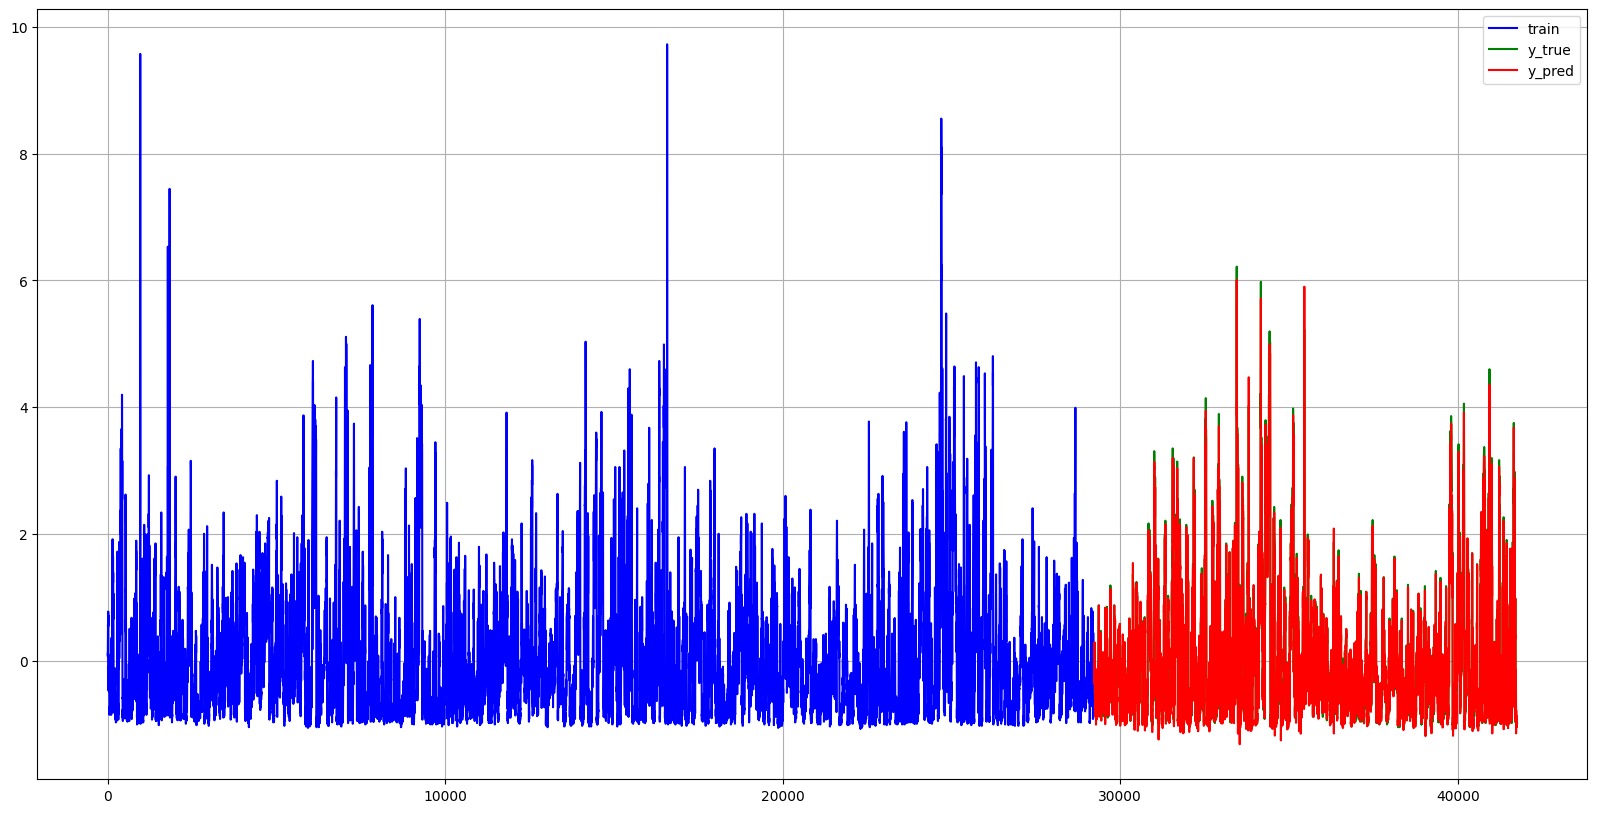

In [42]:
plt.figure(figsize=(20, 10))
plt.grid(which='major', axis='both', zorder=-0.5)
plt.plot( np.array(train_y)[:n],'b',label = 'train')
plt.plot(range(n,full_n),np.array(train_y)[n:],'g',label = 'y_true')
plt.plot(range(n,full_n), y_pred,'r',label = 'y_pred')
plt.legend()

In [43]:
sklearn.metrics.r2_score(train_y[n:], y_pred)

0.9461190983973232